In [45]:
#!/usr/bin/env python3
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

### Get the two sets of effs

In [125]:
b2tf_effs_A = np.genfromtxt('./b2tf_trigger_effs_jets_v2.csv',delimiter=',',names=True)
b2tf_effs_B = np.genfromtxt('./b2tf_trigger_effs_jets_v3.csv',delimiter=',',names=True)
b2tf_df_A = pd.DataFrame(b2tf_effs_A,columns=b2tf_effs_A.dtype.names)
b2tf_df_B = pd.DataFrame(b2tf_effs_B,columns=b2tf_effs_B.dtype.names)
for df in [b2tf_df_A,b2tf_df_B]:
    df['dm'] = df['m1']-df['m0']
    df.sort_values(by = ['ctau', 'm1', 'm0', 'ms'], axis=0, inplace=True,ignore_index=True)

### Compute difference of efficiencies

In [128]:
b2tf_df_A['eff_diff'] = np.abs(b2tf_df_A['eff']-b2tf_df_B['eff'])
b2tf_df_A['eff_rel_diff'] = (np.abs(b2tf_df_A['eff']-b2tf_df_B['eff'])/np.sqrt(b2tf_df_A['efferror']**2 + b2tf_df_B['efferror']**2)).fillna(0.0)

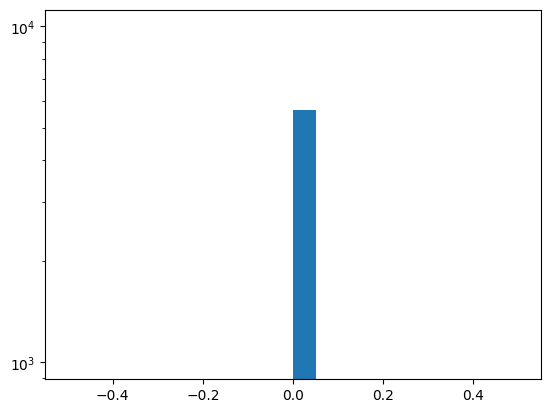

In [129]:
plt.hist(b2tf_df_A['eff_rel_diff'].to_numpy(),bins=20)
plt.yscale('log')
plt.show()